In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Desktop\data science\bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [5]:
df['month'].value_counts()

month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64

In [6]:
df['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [7]:
df['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [8]:
df['housing'].value_counts()

housing
yes    2559
no     1962
Name: count, dtype: int64

In [9]:
df['loan'].value_counts()

loan
no     3830
yes     691
Name: count, dtype: int64

In [10]:
df['default'].value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

In [11]:
df['contact'].value_counts()

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

In [12]:
df['poutcome'].value_counts()

poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64

In [13]:
convert = {'housing': {'yes':1, 'no':0},
           'contact': {'cellular':0, 'unknown':1, 'telephone':2},
           'default': {'yes':1, 'no':0}, 'loan': {'yes':1, 'no':0},
           'education':{'primary':0, 'secondary':1, 'tertiary':2, 'unknown':3},
           'marital':{'married':0, 'single':1, 'divorced':2},
           'job':{'management':0, 'blue-collar':1, 'technician':2, 'admin.':3,
                  'services':4, 'retired':5, 'self-employed':6, 'unemployed':7,
                  'entrepreneur':8, 'housemaid':9, 'student':10, 'unknown':11},
           'month':{'jan':0, 'feb':1,'mar':2, 'apr':3, 'may':4 ,'jun':5, 'jul':6,
                    'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11},
           'poutcome':{'unknown':0, 'failure':1,'other':2, 'success':3}}
df = df.replace(convert)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_31036\1884126217.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(convert)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,7,0,0,0,1787,0,0,0,19,9,79,1,-1,0,0,no
1,33,4,0,1,0,4789,1,1,0,11,4,220,1,339,4,1,no
2,35,0,1,2,0,1350,1,0,0,16,3,185,1,330,1,1,no
3,30,0,0,2,0,1476,1,1,1,3,5,199,4,-1,0,0,no
4,59,1,0,1,0,0,1,0,1,5,4,226,1,-1,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,4,0,1,0,-333,1,0,0,30,6,329,5,-1,0,0,no
4517,57,6,0,2,1,-3313,1,1,1,9,4,153,1,-1,0,0,no
4518,57,2,0,1,0,295,0,0,0,19,7,151,11,-1,0,0,no
4519,28,1,0,1,0,1137,0,0,0,6,1,129,4,211,3,2,no


In [14]:
xc = ['age','job','marital','education','default','balance','housing','loan','contact','day','month',
      'duration','campaign','pdays','previous','poutcome']
y = ['yes','no']
all_inputs = df[xc]
all_classes = df['y']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_inputs, all_classes, test_size=0.7, random_state=1)

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [22]:
clf = clf.fit(x_train, y_train)

In [23]:
score = clf.score(x_test, y_test)
print(score)

0.865086887835703


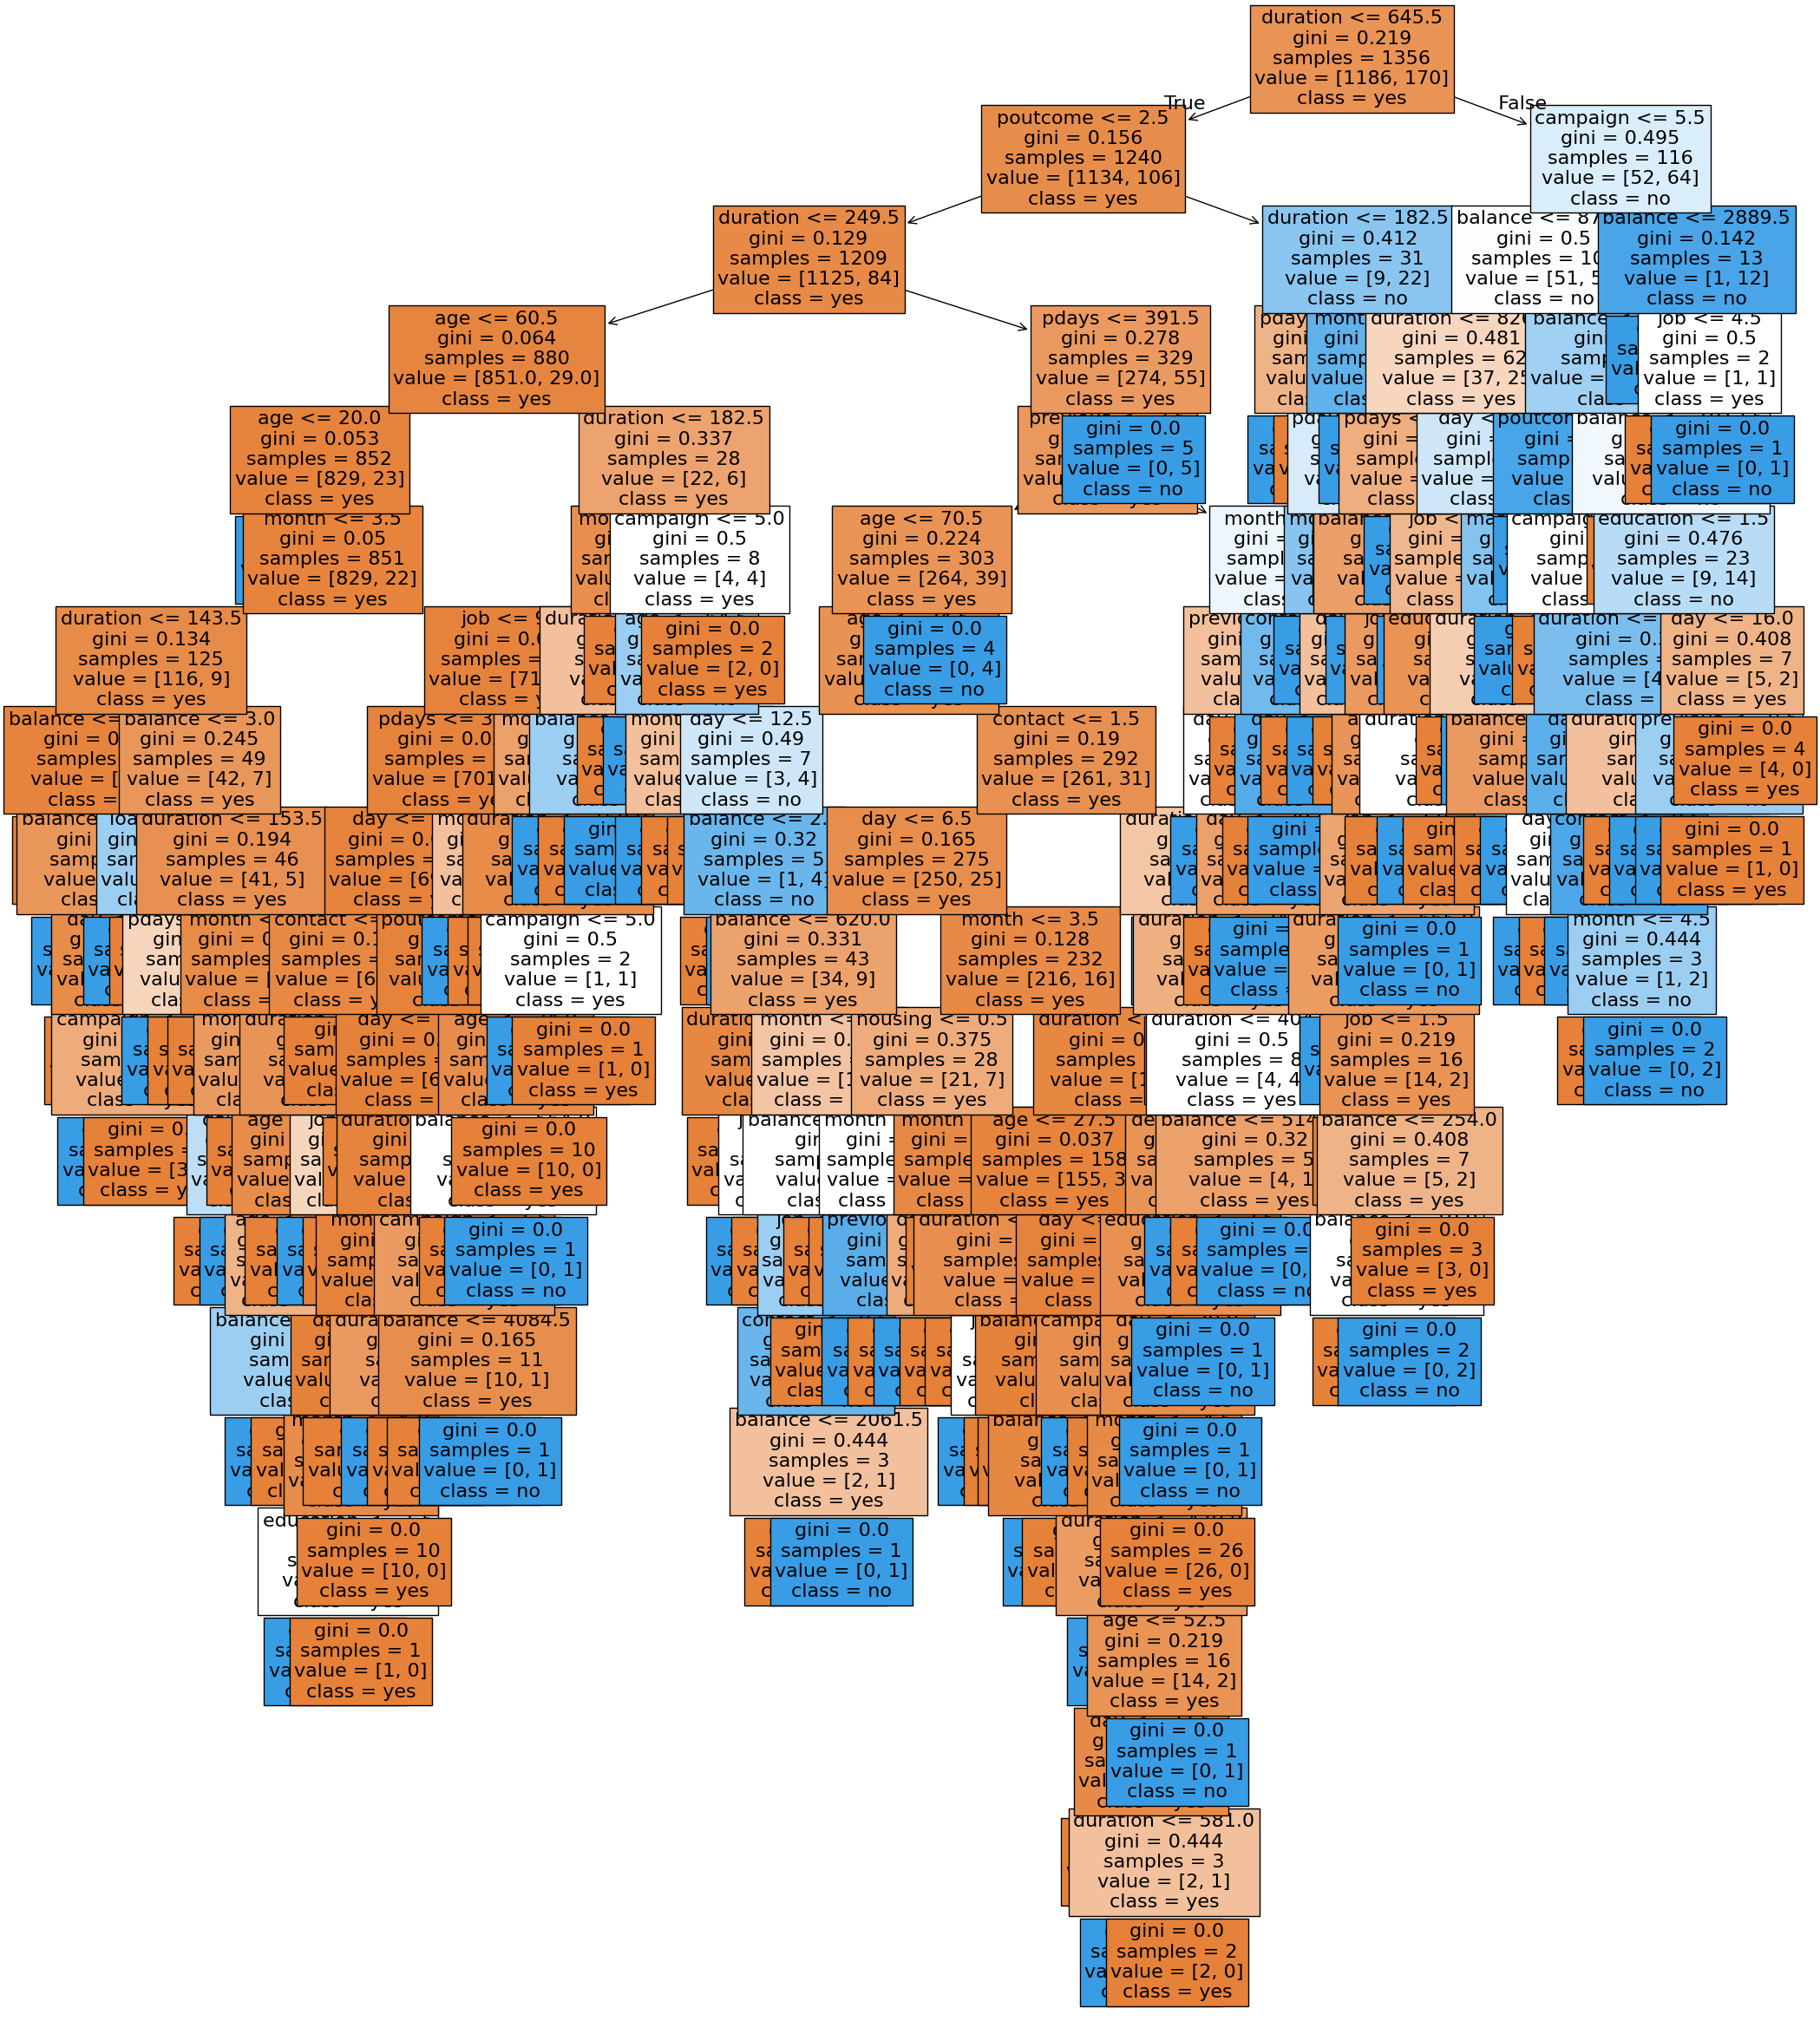

In [24]:
from sklearn import tree

fig = plt.figure(figsize=(25,30))
_=tree.plot_tree(clf,feature_names=xc, class_names=y, filled=True, fontsize = 16)